# Project Background

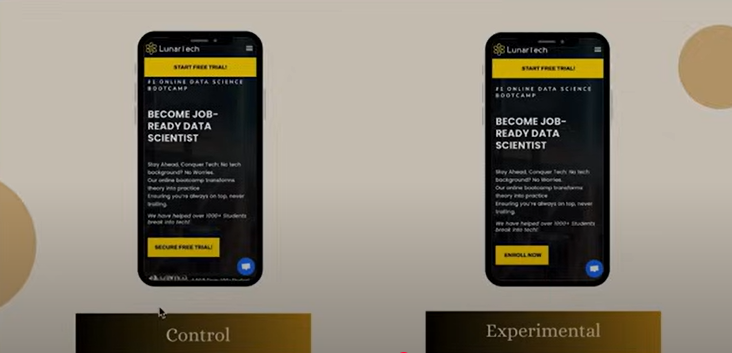

<p>LunarTech.ai would like to test 2 different versions of a landing page on their website.</p><p>The current landing page (control) contains a button with the click text "Secure Free Trial". The new (experimental) version contains a button with the click text "Enroll Now". LunarTech.ai wants to know whether customers click more on the new version button compared to the current version button. AKA, is "Enroll Now" more engaging for users?</p>
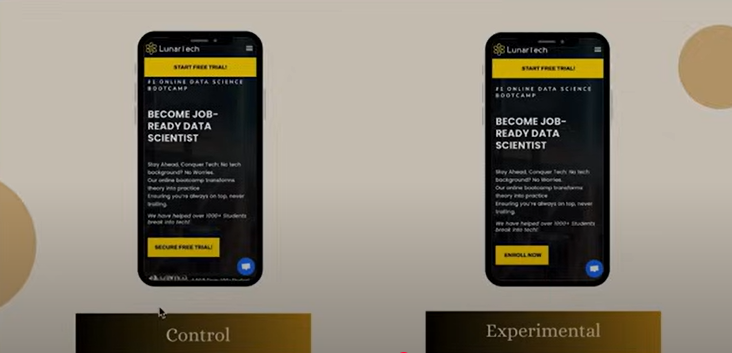
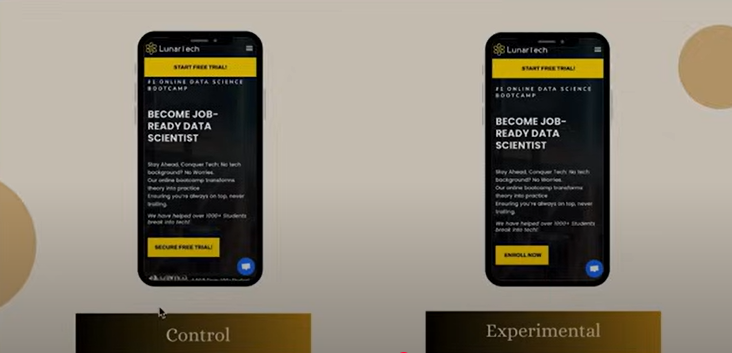

# Experiment Design & Hypothesis

**"What are we trying to test?"**

<p>Can we increase engagement by updating the click text of the button (CTA) on the landing page to "Enroll Now"</p>

**Primary Metric**

<p>We will measure engagement by total clicks on the button. We can use the Click Through Rate (CTR) as a KPI. CTR = (number of clicks/ number of impressions) * 100</p>

**Null and Alternative Hypothesis**

<p>Our null hypothesis is that changing the click text will not change button clicks. Our alternative hypothesis is that changing the click text will increase CTR by at least 10%.</p><p>H0 = Control CTR = Experiment CTR.</p><p>H1 = Control CTR != Experiment CTR</p>

# Power Analysis

**Determining the Power of the Test**

<p>We will use 80% as the power of the A/B test, meaning we allow a 20% chance of making a type II error. (Type II error is when we do not reject a false null hypothesis aka a False Negative)</p>

<p>beta = 0.20</p>

**Determining the Significance Level**

<p>We will use 5% as the significance level of the A/B test, meaning we allow a 5% chance of making a type I error. (Type I error means rejecting the null hypothesis when it is true aka a False Positive)</p>

<p>alpha = 0.05</p>

**Determining the Minimum Detectable Effect of the Test**

<p>A 10% increase in CTR would justify deploying this change to production for the businss.</p>

<p>delta = 0.10</p>

**Calculating the Minimum Sample Size**

<p>Our minimum sample size should be sufficient to ensure our results are repeatable, robust and generalizable to the population. Given the Central Limit Theoreom (CLT), we are assuming the mean of the control and experiment groups follow normal distribution by choosing a large enough sample size. Based on the past CTR on the control version (business knowledge), and plugging our parameters into the Optimizely calculator, we need a minimum of 10,000 visitors per page version.</p>

<p>Minimum Sample Size = 10,000</p>

**Calculating the Test Duration**

<p>Duration = minimum sample size / # visitors per day </p><p>Too small of a test duration will result in a novelty effect. Too large of a test duration will result in a maturation effect. Using business knowledge on current daily traffic and the formula Duration = Minimum sample size/ #visitors per day, our test duration should be 31 days.</p>

<p>Test duration = 31 Days</p>

# Analyzing A/B Test Results

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lunar-tech-case-study-ab-testing/ab_test_click_data (1).csv


In [5]:
#import additional libraries

import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns 

In [6]:
df = pd.read_csv('/kaggle/input/lunar-tech-case-study-ab-testing/ab_test_click_data (1).csv')

In [9]:
#Exploring the Dataset
print(df.head())
print(df.describe())
print(df.groupby('group').sum('click'))

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


**Data Definitions**

<p>Click: 0 = No Click, 1 = Click</p>
<p>Group: con = Control (A) group, exp = Experimental (B) group</p>
<p>user_id: unique user identifier</p>
<p>timestamp: timestamp of click event</p>

**High Level Data Info**

<p>We have 20,000 users between the control and experiment group</p>
<p>There were a total of 1989 clicks on the control version and 6116 clicks on the experiment version</p>
<p>The average CTR is 40.5% for both groups but this doesn't tell us per group performance</p>

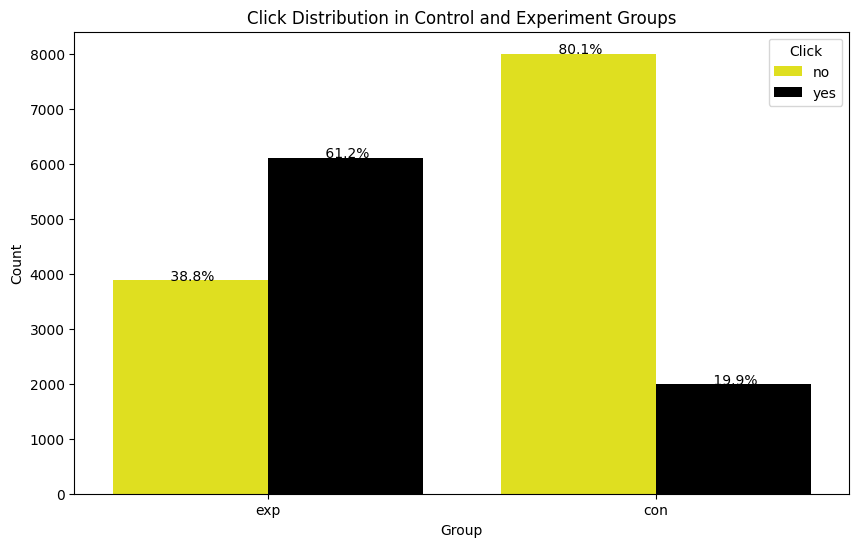

In [16]:
#Visualizing distribution of total clicks vs no clicks in each group

#Custom color palette for LunarTech.ai of yellow and black
lunar_palette = {0: 'yellow', 1: 'black'} #0 for no click, 1 for click

#Plotting click distribution by group with LunarTech.ai palette
plt.figure(figsize = (10,6))
ax = sns.countplot(x='group', hue='click', data=df, palette=lunar_palette)
plt.title('Click Distribution in Control and Experiment Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Click', labels=['no', 'yes'])

#Calculating the percentages and annotating the bars
group_counts = df.groupby('group').size()
group_click_counts = df.groupby(['group','click']).size().reset_index(name='Count')

for p in ax.patches:
    height = p.get_height()
    #Find the group and click type per bar
    group = 'exp' if p.get_x() < 0.5 else 'con'
    click = 1 if p.get_x() % 1 > 0.5 else 0
    total = group_counts.loc[group]
    percentage = 100 * height/total
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{percentage: .1f}%', ha='center', color='black', fontsize=10)

In [18]:
#Referring back to the power analysis and loading parameters into variables for calculations

alpha = 0.05
print('Alpha significance level is: ', alpha)

delta = 0.1
print('Delta minimum detectable effect is: ', delta)

Alpha significance level is:  0.05
Delta minimum detectable effect is:  0.1


# Total Conversions

In [21]:
#Double checking the total clicks for each group

x_con = df.groupby('group')['click'].sum().loc['con']
x_exp = df.groupby('group')['click'].sum().loc['exp']

print('Total Clicks: ', df['click'].sum())
print('Number of clicks in control: ', x_con)
print('Number of clicks in experiment: ', x_exp)

Total Clicks:  8105
Number of clicks in control:  1989
Number of clicks in experiment:  6116


# Estimated Probability of Clicks for Control and Experimental Groups

In [24]:
# Total clicks / # of observations for that group

#Saving group traffic to variables
n_con = 10000
n_exp = 10000

p_con_hat = x_con/n_con
p_exp_hat = x_exp/n_exp

print('Probability of clicks for the control group: ', round(p_con_hat, 2))
print('Probability of clicks for the experiment group: ', round(p_exp_hat, 2))

Probability of clicks for the control group:  0.2
Probability of clicks for the experiment group:  0.61


In [25]:
#Now computing the pooled success probability estimate

p_pooled_hat = (x_con + x_exp) / (n_con + n_exp)

print('Pooled success probability estimate: ', p_pooled_hat)

Pooled success probability estimate:  0.40525


In [26]:
#Now computing the pooled variance

pooled_variance = p_pooled_hat * (1 - p_pooled_hat) * (1 / n_con + 1 / n_exp)

print('Pooled variance: ', pooled_variance)

Pooled variance:  4.82044875e-05


In [27]:
#Now computing the standard error

SE = np.sqrt(pooled_variance)

print('Standard error: ', SE)

Standard error:  0.006942945160376826


In [28]:
#Calculating the test statistic

test_stat = (p_con_hat - p_exp_hat) / SE
print('Test statistic for 2 sample z-test is: ', test_stat)

Test statistic for 2 sample z-test is:  -59.44163326469381


# Calculating the z critical value, p-value and confidence interval

In [30]:
'''While we can hardcode the z critical value by referencing the table, it's not recommended. Instead, I'll use the general code from scipy norm value so this code can be reapplied to other A/B tests later'''

"While we can hardcode the z critical value by referencing the table, it's not recommended. Instead, I'll use the general code from scipy norm value so this code can be reapplied to other A/B tests later"

In [31]:
z_crit = norm.ppf(1-alpha/2)
print('Z critical value from Standard Normal Distribution: ', z_crit)

Z critical value from Standard Normal Distribution:  1.959963984540054


In [33]:
#Calculating the p-value

p_value = 2 * norm.sf(abs(test_stat))
print('p-value of the 2 sample z-test: ', round(p_value, 4))

p-value of the 2 sample z-test:  0.0


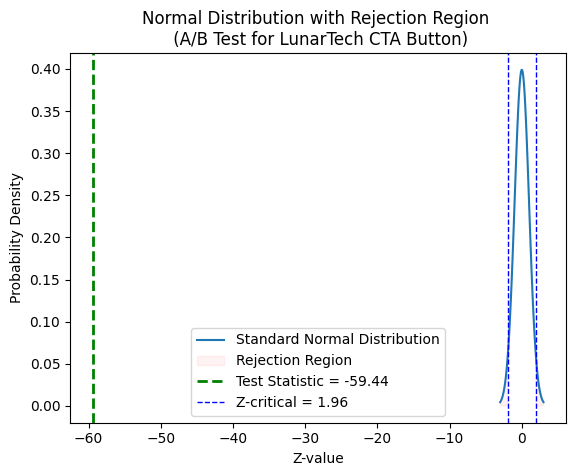

In [43]:
#Visualizing the Results

mu = 0 #mean
sigma = 1 #standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

#Adding in the test statistics and critical value calculations
#Plotting the standard normal distribution
plt.plot(x, y, label = 'Standard Normal Distribution')

#Shading the rejection region for the two tailed test
plt.fill_between(x, y, where=(x > z_crit) | (x < -z_crit), color='red', alpha=0.05, label= 'Rejection Region')

#Adding test statistic
plt.axvline(test_stat, color='green', linestyle='dashed', linewidth=2, label= f'Test Statistic = {test_stat:.2f}')

#Adding z critical values
plt.axvline(z_crit, color='blue', linestyle='dashed', linewidth = 1, label= f'Z-critical = {z_crit:.2f}')
plt.axvline(-z_crit, color='blue', linestyle='dashed', linewidth=1)

#Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with Rejection Region \n (A/B Test for LunarTech CTA Button)')
plt.legend()
plt.show()

<p>We can see the test statistic very clearly falls in the rejection region. So we are safe to reject the null hypothesis.</p>

# Results Analysis: Statistical and Practical Significance of Our Results

<p>Given that the p-value is 0 and smaller than our alpha of 0.05:</p><p>*Our null hypothesis can be rejected</p><p>*There is a statistically significant difference between our control and experiment version results (aka the CTR) </p>

<p>Now that we've determined statistical significance, we can calculate the practical signficance to check the accuracy of the A/B test, generalizability and confidence in our results.</p>

In [44]:
#Given our p_value = 0 and alpha = 0.05

#Calculating the confidence interval
CI = [round((p_exp_hat - p_con_hat) - SE * z_crit, 3), round((p_exp_hat - p_con_hat) + SE * z_crit, 3)]
print('Confidence interval of the 2 sample z-test is: ', CI)

Confidence interval of the 2 sample z-test is:  [0.399, 0.426]


<p>We have a narrow difference between our lower and upper bound values suggesting:</p><p>*Our A/B test results are most likely accurate</p><p>*The precision of our A/B test is high</p><p>*The A/B test we conducted is most likely generalizable to the entire population</p>

<p>Our Delta was 0.10 or 10%. The delta value of 0.10 is much lower than the lower bound level of our confidence interval of .399 or 39.9%, stating we also have practical significance.</p>

# Conclusion

<p>We have statistical significance, practical significance and a narrow confidence interval which suggests our results are generalizable to the population and accurate.</p><p>Our experimental (B) version click text of "Enroll Now" outperformed our control (A) version click text. I would recommend the business implements the B version click text to increase CTR, our measure of increased engagement.</p>